In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [171]:
#ilk olarak precise veri ile çalışmaya başlıyoruz. Veriyi okutalım.
data_pr = pd.read_csv('data_precise.txt',sep='\t')

In [4]:
#veride boşluk varsa bunları atalım.
data_pr = data_pr.dropna()

In [5]:
#verinin bir kısmını incelemek için yazdıralım.

data_pr.head()

,y,intercept,f1,f2,f3,f4
0,28.352789,1.0,0.384440,0.361043,1.952061,0.134687
1,23.516683,1.0,0.460945,1.707639,1.438895,1.729922
2,24.175982,1.0,0.230274,0.315576,1.622533,1.598517
3,26.698449,1.0,0.606996,0.008059,1.155175,0.319348
4,19.363347,1.0,0.923288,0.691859,0.291822,0.601475


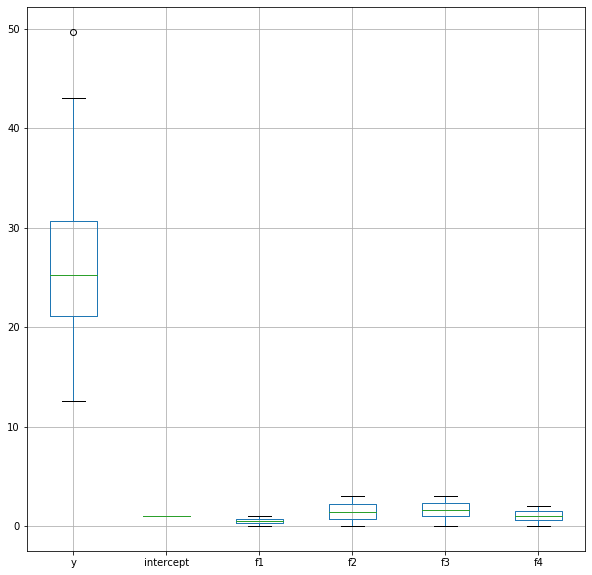

In [172]:
#veri dağılımını gözlemlemek için boxplotları çizdirelim
data_pr.boxplot(figsize=(10,10))

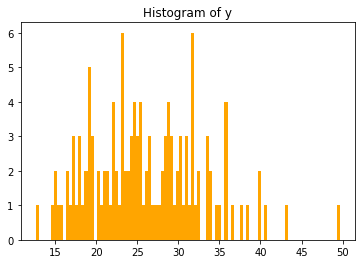

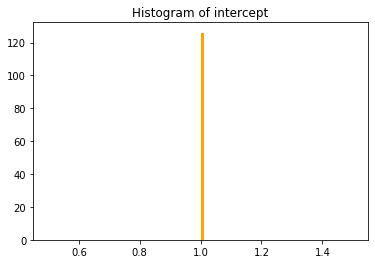

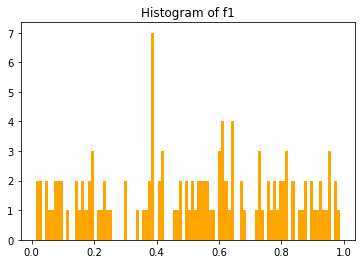

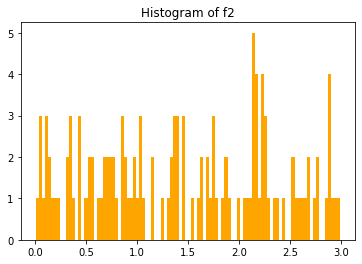

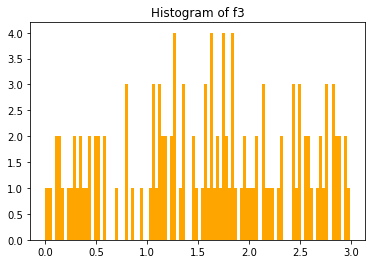

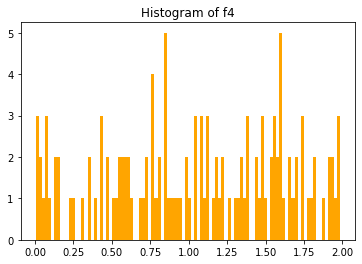

In [9]:
#tüm histogram grafikleri
for i in data_pr.columns:
    plt.figure()
    plt.hist(data_pr[i],bins=100,color="orange")
    plt.title("Histogram of " + i)

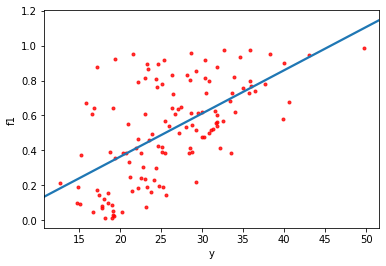

In [10]:
#şimdi elimizdeki öznitelikler ile y arasındaki ilişki dağılımları için tek tek scatter plot çizdirelim.
import seaborn as sns
sns.regplot(data_pr.y, data_pr.f1, order=1, ci=None, scatter_kws={'color':'r', 's':9})


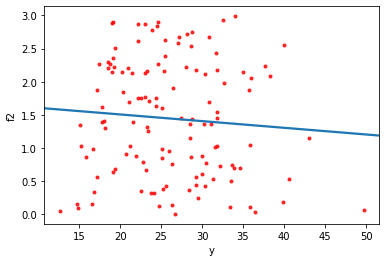

In [11]:

sns.regplot(data_pr.y, data_pr.f2, order=1, ci=None, scatter_kws={'color':'r', 's':9})

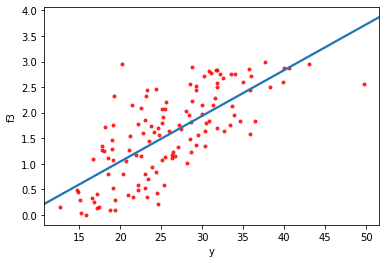

In [12]:

sns.regplot(data_pr.y, data_pr.f3, order=1, ci=None, scatter_kws={'color':'r', 's':9})

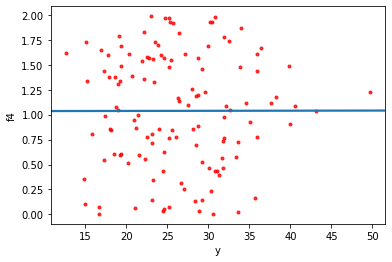

In [13]:

sns.regplot(data_pr.y, data_pr.f4, order=1, ci=None, scatter_kws={'color':'r', 's':9})


Görüldüğü üzere f1 ve f3 veri ile en uyumlu olan öznitelikler

In [66]:
#Veri setini genişletiyoruz.
import math
data_pr2 = pd.DataFrame({
    'y':data_pr['y'],
    'intercept':np.ones_like(data_pr['y']),
    'f1':data_pr['f1'],
    'f2':data_pr['f2'],
    'f3':data_pr['f3'],
    'f4':data_pr['f4'],
    'f5':data_pr['f1']*data_pr['f2'],
    'f6':data_pr['f1']*data_pr['f3'],
    'f7':data_pr['f1']*data_pr['f4'],
    'f8':data_pr['f1']*data_pr['f2'],
    'f9':data_pr['f1']**2,
    'f10':data_pr['f3']**2
})


f1 ve f3 uyumlu olduğu için bunlardan türetilen öznitelikler daha iyi olacaktır.

In [15]:
data_pr2.head()

,y,intercept,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,28.352789,1.0,0.384440,0.361043,1.952061,0.134687,0.138799,0.750451,0.051779,0.138799,0.147794,3.810541
1,23.516683,1.0,0.460945,1.707639,1.438895,1.729922,0.787128,0.663252,0.797400,0.787128,0.212471,2.070419
2,24.175982,1.0,0.230274,0.315576,1.622533,1.598517,0.072669,0.373627,0.368097,0.072669,0.053026,2.632612
3,26.698449,1.0,0.606996,0.008059,1.155175,0.319348,0.004892,0.701186,0.193843,0.004892,0.368444,1.334429
4,19.363347,1.0,0.923288,0.691859,0.291822,0.601475,0.638785,0.269436,0.555334,0.638785,0.852460,0.085160


Şimdi yeni oluşturduğumuz öznitelikler için de scatter plotları çizdirelim...

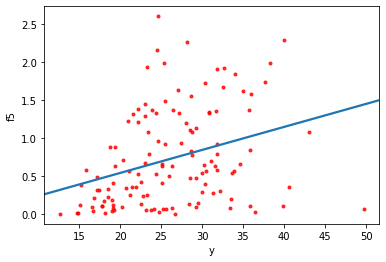

In [16]:
sns.regplot(data_pr2.y, data_pr2.f5, order=1, ci=None, scatter_kws={'color':'r', 's':9})

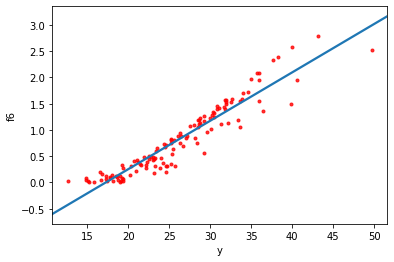

In [17]:
sns.regplot(data_pr2.y, data_pr2.f6, order=1, ci=None, scatter_kws={'color':'r', 's':9})

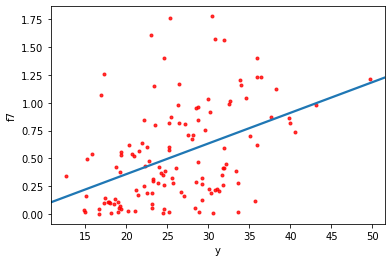

In [19]:
sns.regplot(data_pr2.y, data_pr2.f7, order=1, ci=None, scatter_kws={'color':'r', 's':9})

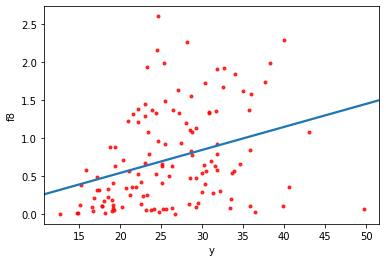

In [20]:
sns.regplot(data_pr2.y, data_pr2.f8, order=1, ci=None, scatter_kws={'color':'r', 's':9})

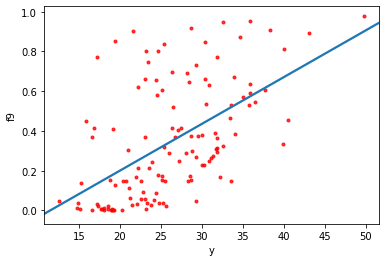

In [21]:
sns.regplot(data_pr2.y, data_pr2.f9, order=1, ci=None, scatter_kws={'color':'r', 's':9})

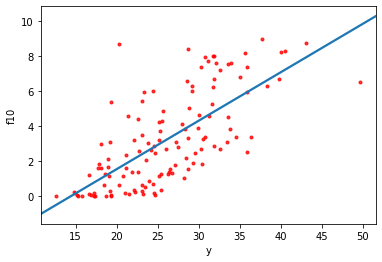

In [22]:
sns.regplot(data_pr2.y, data_pr2.f10, order=1, ci=None, scatter_kws={'color':'r', 's':9})

Görüldüğü gibi f6 özniteliği veri ile güzel bir uyum sağladı.

In [23]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [41]:
X1 = np.vstack( (np.ones(len(data_pr2.f1)) , data_pr2.f1) ).T

print (X1[1:10,:])

[[1.         0.46094531]
 [1.         0.23027393]
 [1.         0.60699587]
 [1.         0.92328754]
 [1.         0.22110634]
 [1.         0.1439902 ]
 [1.         0.89689922]
 [1.         0.67115651]
 [1.         0.41336689]]


In [47]:
A1 = np.dot(X1.T, X1)
b1 = np.dot(X1.T,data_pr2.y)

In [48]:

betas1 = np.dot( np.linalg.inv(A1) , b1)

print (betas1)

[18.71919709 14.35993927]


In [44]:
X2 = np.vstack( (np.ones(len(data_pr2.f2)) , data_pr2.f2) ).T

print (X2[1:10,:])

[[1.         1.70763948]
 [1.         0.31557564]
 [1.         0.00805868]
 [1.         0.69185937]
 [1.         0.44081543]
 [1.         0.43443341]
 [1.         2.16374771]
 [1.         0.87092191]
 [1.         1.15274753]]


In [64]:
regr = skl_lm.LinearRegression()

X = scale(data_pr2.f1, with_mean=True, with_std=False).reshape(-1,1)
y = data_pr2.y

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

26.11448483089203
[14.35993927]


In [93]:
#özniteliklerin std ve mean değerlerini bulalım. 
stdf1 = np.std(data_pr2.f1)
stdf2 = np.std(data_pr2.f2)
stdf3 = np.std(data_pr2.f3)
stdf4 = np.std(data_pr2.f4)
stdf5 = np.std(data_pr2.f5)
stdf6 = np.std(data_pr2.f6)
stdf7 = np.std(data_pr2.f7)
stdf8 = np.std(data_pr2.f8)
stdf9 = np.std(data_pr2.f9)
stdf10 = np.std(data_pr2.f10)
ortstd=(stdf1+stdf2+stdf3+stdf4+stdf5+stdf6+stdf7+stdf8+stdf9+stdf10)/10
print(ortstd)

0.7869362481008869


In [94]:
#aslında verimiz zaten precise ve noise olarak verildiği için bu adımı yapmamıza gerek yok.
noise = np.random.randn(len(data_pr2.f1))*ortstd
y1 = data_pr2.y + noise

In [99]:
# Beta değerlerini kestirelim.
y_1 = y

X_1 = np.vstack(
    (
        np.ones(len(data_pr2.f1)),
        data_pr2.f1,data_pr2.f2,data_pr2.f3,data_pr2.f4,data_pr2.f5,data_pr2.f6,data_pr2.f7,data_pr2.f8,data_pr2.f9,data_pr2.f10
    )
).T

beta_1 = np.linalg.lstsq(X_1, y_1)[0]

print (beta_1)

[13.31458402  6.45148054 -0.26887845  3.74924827  0.73784766 -0.17143771
  6.11655648 -0.44469464 -0.17143771 -0.05213106 -0.4200373 ]


c:\users\yelkindiyebiri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


In [155]:
#Residualları hesaplayalım.
modeled = np.dot(X_1, beta_1)

residuals1 = y_1 - modeled
print(residuals1)

0      2.325651
1     -1.535330
2      1.209757
3      1.282092
4     -2.361522
         ...   
121   -0.465642
122   -1.121538
123   -0.379647
124   -1.534396
125   -0.528343
Name: y, Length: 126, dtype: float64


Residual Mean  -1.457740453920523e-14  Residual Std  1.9171057665786235


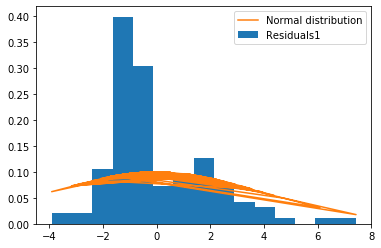

In [157]:
#Residualların ortalama ve standart sapma değerlerine bakalım.
r_mean1 = residuals1.mean()
r_std1 = residuals1.std(ddof=3) # N-p-1
from scipy.stats import norm
print ('Residual Mean ',r_mean1,' Residual Std ', r_std1)




plt.hist(residuals1, label='Residuals1', bins=15,density=True)
plt.plot(residuals1,norm.pdf(residuals1, 0, 4), label='Normal distribution')
plt.legend()

In [142]:
t_test1 = (r_mean1 - 0) / (r_std1 / np.sqrt(len(X_1)))

print (t_test1)

-8.53531208214729e-14


In [144]:
p_t = stats.distributions.t.sf(np.abs(t_test1), len(X_1)-1)
print (p_t)

0.499999999999966


In [145]:
z_test1 = (r_mean1 - 0) / (4 / np.sqrt(len(X_1)))

print (z_test1)

p_z1 = stats.distributions.norm.sf(np.abs(z_test1))

print (p_z1)

-4.090774003058192e-14
0.4999999999999837


In [153]:
#Tüm test değerlerini özetleyecek olursak: 
t_test1 = (r_mean1 - 0) / (r_std1 / np.sqrt(len(X_1)))

print ('T Score ',t_test1)

p_t1 = stats.distributions.t.sf(np.abs(t_test1), len(X_1)-1)

print ('P value for t test ',p_t1)

z_test1 = (r_mean1 - 0) / (4 / np.sqrt(len(X_1)))

print ('Z score ',z_test1)

p_z1 = stats.distributions.norm.sf(np.abs(z_test1))

print ('P value for z score ',p_z1)


T Score  -8.53531208214729e-14
P value for t test  0.499999999999966
Z score  -4.090774003058192e-14
P value for z score  0.4999999999999837


In [154]:
print ('Reject null hypothesis, since beta0 should not be 0 given the data and confidence.')

Reject null hypothesis, since beta0 should not be 0 given the data and confidence.


H0 hipotezi reddedildi.

# NOISE DATA

In [100]:
#Noise verisiyle çalışmak için veriyi okutalım.
data_n = pd.read_csv('data_noisy.txt',sep='\t')

In [101]:
#boş öznitelik varsa siliyoruz.
data_pr = data_pr.dropna()

In [103]:
#verinin bir kısmına göz atalım.
data_n.head()

,y,intercept,f1,f2,f3,f4
0,35.559982,1.0,0.384440,0.361043,1.952061,0.134687
1,20.783984,1.0,0.460945,1.707639,1.438895,1.729922
2,20.905187,1.0,0.230274,0.315576,1.622533,1.598517
3,23.088124,1.0,0.606996,0.008059,1.155175,0.319348
4,19.906639,1.0,0.923288,0.691859,0.291822,0.601475


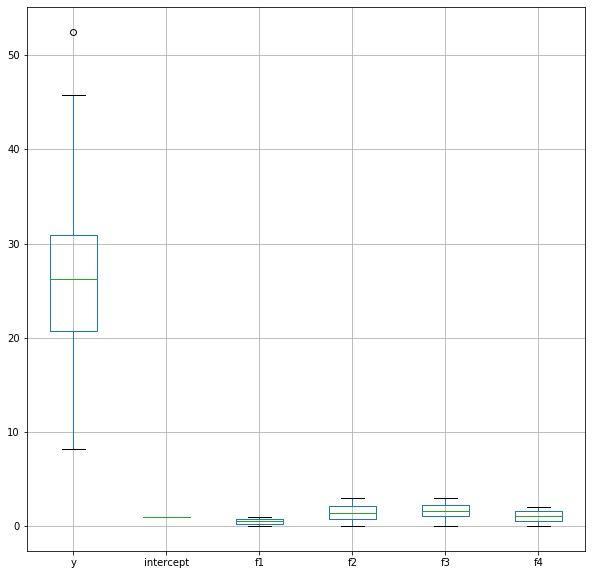

In [105]:
#Boxplotları çizdirelim.
data_n.boxplot(figsize=(10,10))

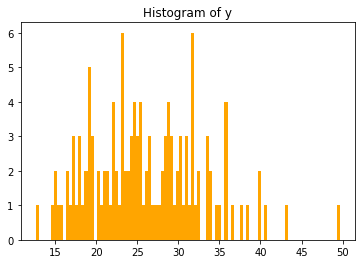

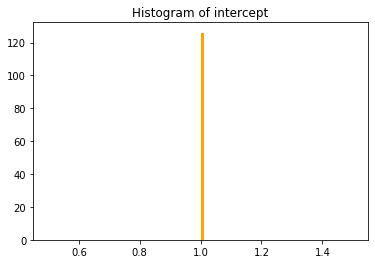

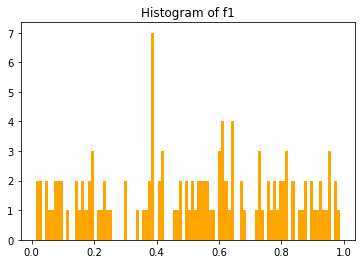

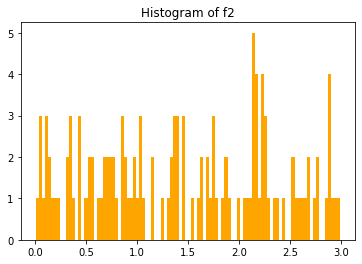

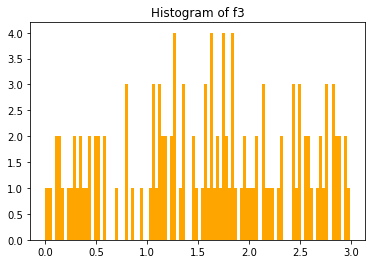

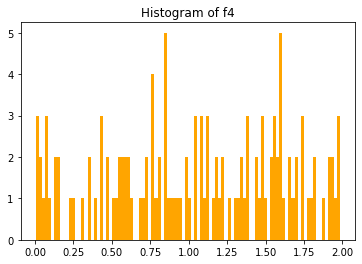

In [106]:
#tüm histogram grafikleri
for i in data_n.columns:
    plt.figure()
    plt.hist(data_pr[i],bins=100,color="orange")
    plt.title("Histogram of " + i)

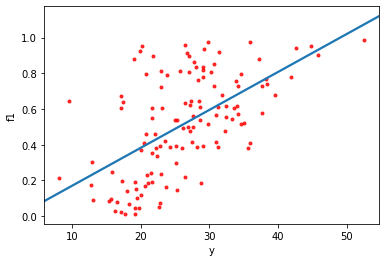

In [107]:
#scatter plotları çizdirelim.
import seaborn as sns
sns.regplot(data_n.y, data_n.f1, order=1, ci=None, scatter_kws={'color':'r', 's':9})

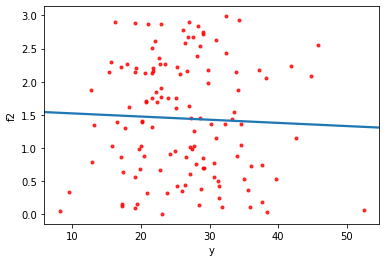

In [108]:
sns.regplot(data_n.y, data_n.f2, order=1, ci=None, scatter_kws={'color':'r', 's':9})

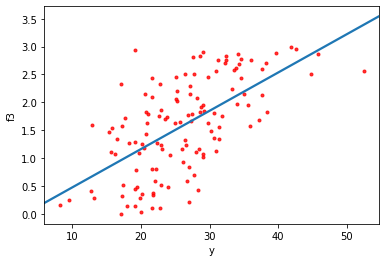

In [109]:
sns.regplot(data_n.y, data_n.f3, order=1, ci=None, scatter_kws={'color':'r', 's':9})

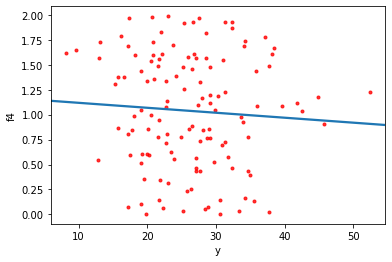

In [110]:
sns.regplot(data_n.y, data_n.f4, order=1, ci=None, scatter_kws={'color':'r', 's':9})

f1 ve f3 en uyumlu özniteliklerimiz oldu...

In [111]:
#veri setini genişletelim.
import math
data_n2 = pd.DataFrame({
    'y':data_n['y'],
    'intercept':np.ones_like(data_n['y']),
    'f1':data_n['f1'],
    'f2':data_n['f2'],
    'f3':data_n['f3'],
    'f4':data_n['f4'],
    'f5':data_n['f1']*data_n['f2'],
    'f6':data_n['f1']*data_n['f3'],
    'f7':data_n['f1']*data_n['f4'],
    'f8':data_n['f1']*data_n['f2'],
    'f9':data_n['f1']**2,
    'f10':data_n['f3']**2
})


In [174]:
#genişlemiş veriye bakalım.
data_n2.head()

,y,intercept,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,35.559982,1.0,0.384440,0.361043,1.952061,0.134687,0.138799,0.750451,0.051779,0.138799,0.147794,3.810541
1,20.783984,1.0,0.460945,1.707639,1.438895,1.729922,0.787128,0.663252,0.797400,0.787128,0.212471,2.070419
2,20.905187,1.0,0.230274,0.315576,1.622533,1.598517,0.072669,0.373627,0.368097,0.072669,0.053026,2.632612
3,23.088124,1.0,0.606996,0.008059,1.155175,0.319348,0.004892,0.701186,0.193843,0.004892,0.368444,1.334429
4,19.906639,1.0,0.923288,0.691859,0.291822,0.601475,0.638785,0.269436,0.555334,0.638785,0.852460,0.085160


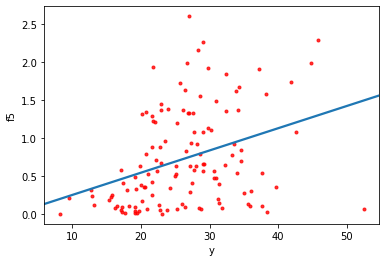

In [116]:
#yeni özniteliklerin scatterlarına bakalım.
sns.regplot(data_n2.y, data_n2.f5, order=1, ci=None, scatter_kws={'color':'r', 's':9})

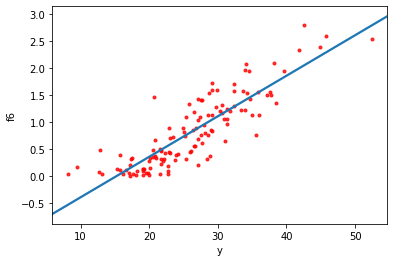

In [117]:
sns.regplot(data_n2.y, data_n2.f6, order=1, ci=None, scatter_kws={'color':'r', 's':9})

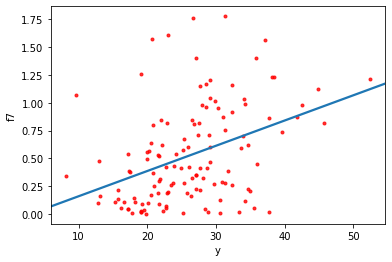

In [118]:
sns.regplot(data_n2.y, data_n2.f7, order=1, ci=None, scatter_kws={'color':'r', 's':9})

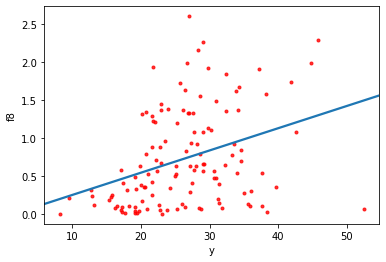

In [119]:
sns.regplot(data_n2.y, data_n2.f8, order=1, ci=None, scatter_kws={'color':'r', 's':9})

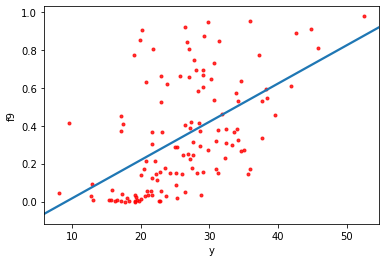

In [120]:
sns.regplot(data_n2.y, data_n2.f9, order=1, ci=None, scatter_kws={'color':'r', 's':9})

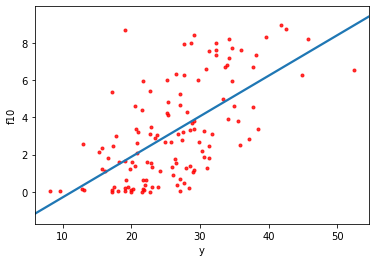

In [121]:
sns.regplot(data_n2.y, data_n2.f10, order=1, ci=None, scatter_kws={'color':'r', 's':9})

f6 en iyi uyum sağlayan öznitelik oldu.

In [123]:
stdf1n = np.std(data_n2.f1)
stdf2n = np.std(data_n2.f2)
stdf3n = np.std(data_n2.f3)
stdf4n = np.std(data_n2.f4)
stdf5n = np.std(data_n2.f5)
stdf6n = np.std(data_n2.f6)
stdf7n = np.std(data_n2.f7)
stdf8n = np.std(data_n2.f8)
stdf9n = np.std(data_n2.f9)
stdf10n = np.std(data_n2.f10)
ortstdn=(stdf1n+stdf2n+stdf3n+stdf4n+stdf5n+stdf6n+stdf7n+stdf8n+stdf9n+stdf10n)/10
print(ortstdn)

0.7869362481008869


In [124]:
noisen = np.random.randn(len(data_n2.f1))*ortstdn
y2 = data_n2.y + noisen

In [125]:
#betaları kestirelim.
y_2 = y2

X_2 = np.vstack(
    (
        np.ones(len(data_n2.f1)),
        data_n2.f1,data_n2.f2,data_n2.f3,data_n2.f4,data_n2.f5,data_n2.f6,data_n2.f7,data_n2.f8,data_n2.f9,data_n2.f10
    )
).T

beta_2 = np.linalg.lstsq(X_2, y_2)[0]

print (beta_2)

[18.13603515 -1.11794932 -0.40043215  2.08684054 -2.22148437  0.26985266
  6.91087686  3.98255998  0.26985266  1.22765243 -0.09363403]


c:\users\yelkindiyebiri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


In [131]:
print("mean 1: ", np.mean(beta_1))
print("standart deviation 1: ", np.std(beta_1))
print("variance 1: ", np.var(beta_1))

mean 1:  2.6219181918336254
standart deviation 1:  4.219029060873451
variance 1:  17.800206216494715


In [132]:
print("mean 1: ", np.mean(beta_2))
print("standart deviation 1: ", np.std(beta_2))
print("variance 1: ", np.var(beta_2))

mean 1:  2.640924582043543
standart deviation 1:  5.462092976123849
variance 1:  29.834459679821478


In [ ]:
modeled = np.dot(X, betas_1)

residuals = y_obs - modeled

plt.plot(x , residuals, label = ' Residuals')
plt.legend()

In [129]:
from scipy import stats
statistic, p_value = stats.ttest_rel(data_pr2.y,data_pr2.f1)
print('p-value: ',p_value)

p-value:  3.665350652016392e-77


In [ ]:
#parametrelerin p değerinin hesaplanması
p_val = 1-(stats.t.cdf(...))

In [160]:
modeled = np.dot(X_2, beta_2)

residuals2 = y_2 - modeled
print(residuals2)

0      10.136776
1      -2.250641
2       0.161576
3      -3.026251
4      -1.123148
         ...    
121     4.230122
122     1.395067
123    -3.648910
124    -0.306988
125    -2.604990
Name: y, Length: 126, dtype: float64


Residual Mean  -6.865760164983508e-15  Residual Std  3.7661018013872156


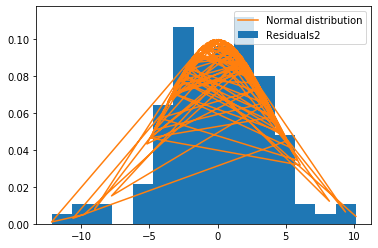

In [161]:
r_mean2 = residuals2.mean()
r_std2 = residuals2.std(ddof=3) # N-p-1
from scipy.stats import norm
print ('Residual Mean ',r_mean2,' Residual Std ', r_std2)




plt.hist(residuals2, label='Residuals2', bins=15,density=True)
plt.plot(residuals2,norm.pdf(residuals2, 0, 4), label='Normal distribution')
plt.legend()

In [162]:
t_test2 = (r_mean2 - 0) / (r_std2 / np.sqrt(len(X_2)))

print ('T Score ',t_test2)

p_t2 = stats.distributions.t.sf(np.abs(t_test2), len(X_2)-1)

print ('P value for t test ',p_t2)

z_test2 = (r_mean2 - 0) / (4 / np.sqrt(len(X_2)))

print ('Z score ',z_test2)

p_z2 = stats.distributions.norm.sf(np.abs(z_test2))

print ('P value for z score ',p_z2)


T Score  -2.046359094249631e-14
P value for t test  0.49999999999999184
Z score  -1.9266991677846613e-14
P value for z score  0.49999999999999234


In [163]:
print ('Accept null hypothesis')

Accept null hypothesis


In [ ]:
import statsmodels.api as sm
## Bu fonksiyon pandas data frame verildiginde backward subset selection uygulamaktadir.
## Lutfen icindeki eksik bolumleri tamamlayin.
def learn_linear_lsq_backward(p_frame, p_val_threshold=0.025):
"""
p_frame : a pandas data frame such that.
first column is y
the rest are linear features.
"""
# These are columns used in full model
columns = list(p_frame.columns[1:])
for i in range(10):
# Current design matrix
# Note that column list will change in the loop
# This is a simple implementation of subset selection
# from a pandas data frame
X_m = p_frame[columns].to_numpy() #değerleri array şeklinde yazdık.
y = p_frame.y
XX = np.dot(X_m.T, X_m)
yy = np.dot(X_m.T,y)
## current parameters
betas = np.linalg.solve(XX,yy)
while (len(columns)>0):
    p= []
    X_1 = XX[columns]
    X_1 = sm.add_constant(X_1) #Intercept varsayılan olarak dahil değil bu nedenle ekliyoruz.
    betas = sm.OLS(y,X_1).fit() #Least squares
    p = pd.Series(betas.pvals.values[1:],index = columns)      
    pmax = max(p)
    pv_i = p.idxmax() #satırdaki maksimum değeri p ye ekleyerek döngüyü tekrarladık.

print ('Iteration ',i, ' Found largest pvalue for column ',columns[pv_i], ' With value =', pvals[pv_i])
if (pvals[pv_i]<p_val_threshold):
## Finished with training
    selected_features_be = columns
    
break
## Remove the column from the model and loop to remove another one
columns.remove(feature_with_p_max)

del columns[pv_i]
return columns
print ('Columns for precise data ', learn_linear_lsq_backward(p2_pr,p_val_threshold=0.025))
print ('Columns for noisy data ', learn_linear_lsq_backward(p2_lq,p_val_threshold=0.025))